# <code style="background:	#77C3EC;color:#00008B;">                PREPARED BY : ANIKET SINGH (EDA)                                        <code style="background:yellow;color:#366ae8;">                                                                                                                                    

In [1]:
import pandas as pd
import numpy as np

In [2]:
Train_Data=pd.read_csv("Training Dataset.csv")

In [3]:
Train_Data.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
import pandas as pd

def add_duplicate_count(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Exclude the 'Count+Unique' column when checking for duplicates
    cols_to_check = df_copy.columns.difference(['Count+Unique'])
    
    # Mark duplicates based on all columns except 'Count+Unique'
    df_copy['Duplicate'] = df_copy.duplicated(subset=cols_to_check, keep=False)
    
    # Count the number of duplicates for each row and update 'Duplicate' column
    df_copy['Count'] = df_copy.groupby(list(cols_to_check))['Duplicate'].transform('sum')
    
    # Count the number of unique rows for each group
    df_copy['Unique'] = (~df_copy.duplicated(subset=cols_to_check, keep=False)).astype(int)
    
    # Merge 'Count' and 'Unique' columns into a single column 'Count+Unique'
    df_copy['Count+Unique'] = df_copy['Count'] + df_copy['Unique']
    
    # Drop 'Count' and 'Unique' columns to keep only 'Count+Unique'
    df_copy = df_copy.drop(columns=['Count', 'Unique', 'Duplicate'])  # Remove 'Count' and 'Unique' columns
    
    # Remove duplicates based on all columns except 'Count+Unique'
    df_copy = df_copy.drop_duplicates(subset=cols_to_check)
    
    return df_copy


# Call the function to add the 'Count+Unique' column by merging 'Count' and 'Unique'
Train_Data = add_duplicate_count(Train_Data)

Train_Data.rename(columns={'Count+Unique': 'GranuleComboUnits'}, inplace=True)
Train_Data = Train_Data.reset_index(drop=True)

Train_Data.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,GranuleComboUnits
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,62
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,38
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,64
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,135
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,31


# <code style="background:	#77C3EC;color:#00008B;">DATA PREPROCESSING FOR EDA                                                 <code style="background:#77C3EC;color:#00008B;">

In [5]:
# Convert 'Month of Sourcing' column to datetime format with custom format
Train_Data['Month of Sourcing'] = pd.to_datetime(Train_Data['Month of Sourcing'], format='%b-%y')

# Extract month and year into separate columns
Train_Data['Month'] = Train_Data['Month of Sourcing'].dt.strftime('%b')
Train_Data['Year'] = Train_Data['Month of Sourcing'].dt.strftime('%Y')

# Drop 'Area Code' and 'Month of Sourcing' columns
Train_Data.drop(columns=['Month of Sourcing'], inplace=True)

# Display the DataFrame after dropping columns
Train_Data.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,GranuleComboUnits,Month,Year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16,62,May,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,134.28,38,Oct,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,12.46,64,Dec,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22,135,Feb,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,197.76,31,Nov,2020


In [6]:
Train_Data.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,GranuleComboUnits,Month,Year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16,62,May,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,134.28,38,Oct,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,12.46,64,Dec,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22,135,Feb,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,197.76,31,Nov,2020


In [7]:
# Rename the 'ProductType' column to 'ProductName'
Train_Data.rename(columns={'ProductType': 'ProductName'}, inplace=True)

## <code style="background:#CCF381;color:#00008B;">Line Distribution of Products by Sourcing Channel with Month and Year


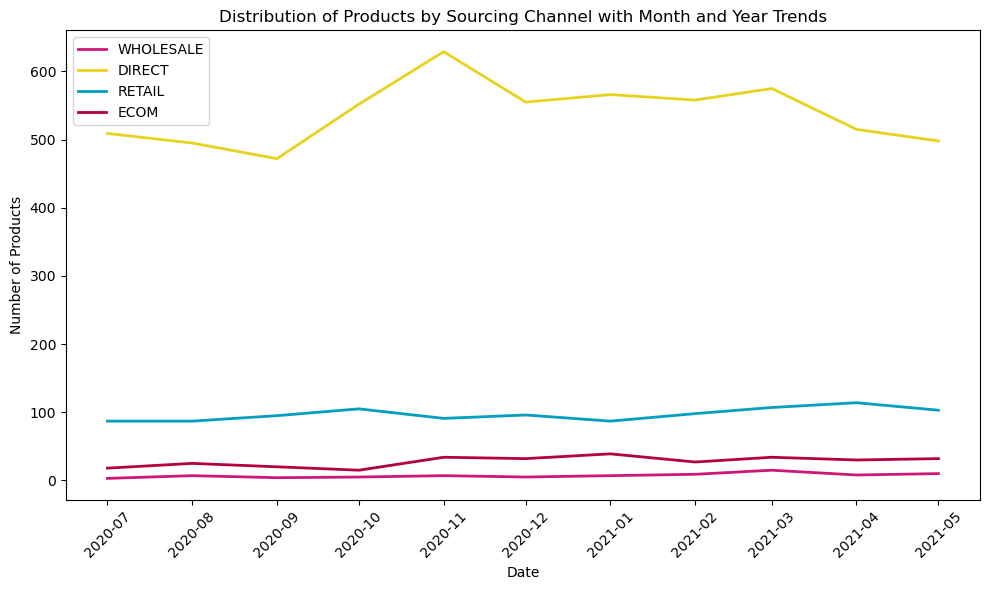

------------------------------
Sourcing Channel Report
------------------------------
Sourcing Channel: WHOLESALE
Total Products: 80
Average Products per Month: 7.27
Maximum Products in a Month: 15
Minimum Products in a Month: 3


Sourcing Channel: DIRECT
Total Products: 5924
Average Products per Month: 538.55
Maximum Products in a Month: 629
Minimum Products in a Month: 472


Sourcing Channel: RETAIL
Total Products: 1070
Average Products per Month: 97.27
Maximum Products in a Month: 114
Minimum Products in a Month: 87


Sourcing Channel: ECOM
Total Products: 306
Average Products per Month: 27.82
Maximum Products in a Month: 39
Minimum Products in a Month: 15




In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Train_Data is your actual DataFrame with the correct structure and data

# Convert 'Month' and 'Year' columns to datetime format
Train_Data['Date'] = pd.to_datetime(Train_Data['Month'] + ' ' + Train_Data['Year'].astype(str), format='%b %Y')

# Plotting sourcing channel distribution with month and year trends
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#cf1578', '#e8d21d', '#039fbe', '#b20238']

channel_report = []  # List to store channel-wise report

for i, channel in enumerate(Train_Data['Sourcing Channel'].unique()):
    channel_data = Train_Data[Train_Data['Sourcing Channel'] == channel]
    monthly_trend = channel_data.groupby('Date').size().reset_index(name='Count')
    ax.plot(monthly_trend['Date'], monthly_trend['Count'], color=colors[i], linewidth=2, label=channel)
    
    # Generate channel-wise report
    channel_report.append({
        'Sourcing Channel': channel,
        'Total Products': channel_data.shape[0],
        'Average Products per Month': monthly_trend['Count'].mean(),
        'Maximum Products in a Month': monthly_trend['Count'].max(),
        'Minimum Products in a Month': monthly_trend['Count'].min()
    })

ax.set_xlabel('Date')
ax.set_ylabel('Number of Products')
ax.set_title('Distribution of Products by Sourcing Channel with Month and Year Trends')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the report
print(f"{'-'*30}\nSourcing Channel Report\n{'-'*30}")
for report in channel_report:
    print(f"Sourcing Channel: {report['Sourcing Channel']}")
    print(f"Total Products: {report['Total Products']}")
    print(f"Average Products per Month: {report['Average Products per Month']:.2f}")
    print(f"Maximum Products in a Month: {report['Maximum Products in a Month']}")
    print(f"Minimum Products in a Month: {report['Minimum Products in a Month']}")
    print('\n')


 <div class="alert alert-warning">
 
 ## <code style="background:;color:#00008B;">Sourcing Channel Performance:

<b>The DIRECT sourcing channel has the highest total products (5924), followed by RETAIL (1070), ECOM (306), and WHOLESALE (80).
The average number of products per month provides an insight into the consistent performance of each channel. DIRECT has the highest average per month (538.55), followed by RETAIL (97.27), ECOM (27.82), and WHOLESALE (7.27).
Understanding the maximum and minimum products in a month for each channel helps in identifying peak periods and variations in sourcing activity.

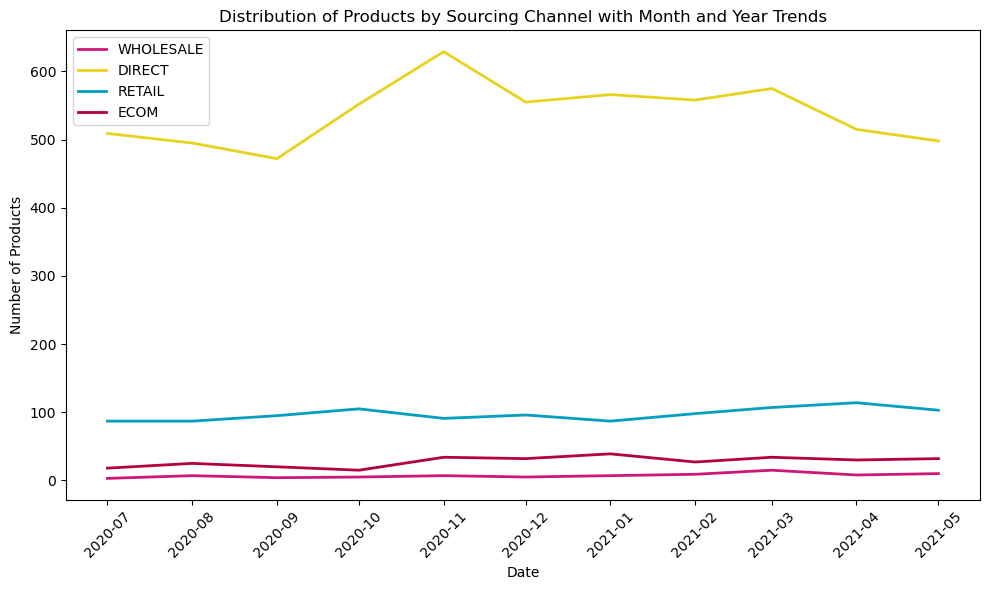

------------------------------
Sourcing Channel Report
------------------------------
Sourcing Channel: WHOLESALE
Total Products: 80
Average Products per Month: 7.27
Maximum Products in a Month: 15
Minimum Products in a Month: 3


Sourcing Channel: DIRECT
Total Products: 5924
Average Products per Month: 538.55
Maximum Products in a Month: 629
Minimum Products in a Month: 472


Sourcing Channel: RETAIL
Total Products: 1070
Average Products per Month: 97.27
Maximum Products in a Month: 114
Minimum Products in a Month: 87


Sourcing Channel: ECOM
Total Products: 306
Average Products per Month: 27.82
Maximum Products in a Month: 39
Minimum Products in a Month: 15




In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Train_Data is your actual DataFrame with the correct structure and data

# Convert 'Month' and 'Year' columns to datetime format
Train_Data['Date'] = pd.to_datetime(Train_Data['Month'] + ' ' + Train_Data['Year'].astype(str), format='%b %Y')

# Plotting sourcing channel distribution with month and year trends
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#cf1578', '#e8d21d', '#039fbe', '#b20238']

channel_report = []  # List to store channel-wise report

for i, channel in enumerate(Train_Data['Sourcing Channel'].unique()):
    channel_data = Train_Data[Train_Data['Sourcing Channel'] == channel]
    monthly_trend = channel_data.groupby('Date').size().reset_index(name='Count')
    ax.plot(monthly_trend['Date'], monthly_trend['Count'], color=colors[i], linewidth=2, label=channel)
    
    # Generate channel-wise report
    channel_report.append({
        'Sourcing Channel': channel,
        'Total Products': channel_data.shape[0],
        'Average Products per Month': monthly_trend['Count'].mean(),
        'Maximum Products in a Month': monthly_trend['Count'].max(),
        'Minimum Products in a Month': monthly_trend['Count'].min()
    })

ax.set_xlabel('Date')
ax.set_ylabel('Number of Products')
ax.set_title('Distribution of Products by Sourcing Channel with Month and Year Trends')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the report
print(f"{'-'*30}\nSourcing Channel Report\n{'-'*30}")
for report in channel_report:
    print(f"Sourcing Channel: {report['Sourcing Channel']}")
    print(f"Total Products: {report['Total Products']}")
    print(f"Average Products per Month: {report['Average Products per Month']:.2f}")
    print(f"Maximum Products in a Month: {report['Maximum Products in a Month']}")
    print(f"Minimum Products in a Month: {report['Minimum Products in a Month']}")
    print('\n')


## <code style="background:#CCF381;color:#00008B;">UNDERSTANDING MONOPOLY USING DONUT CHART


In [10]:
Train_Data.columns

Index(['ProductName', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'GranuleComboUnits',
       'Month', 'Year', 'Date'],
      dtype='object')

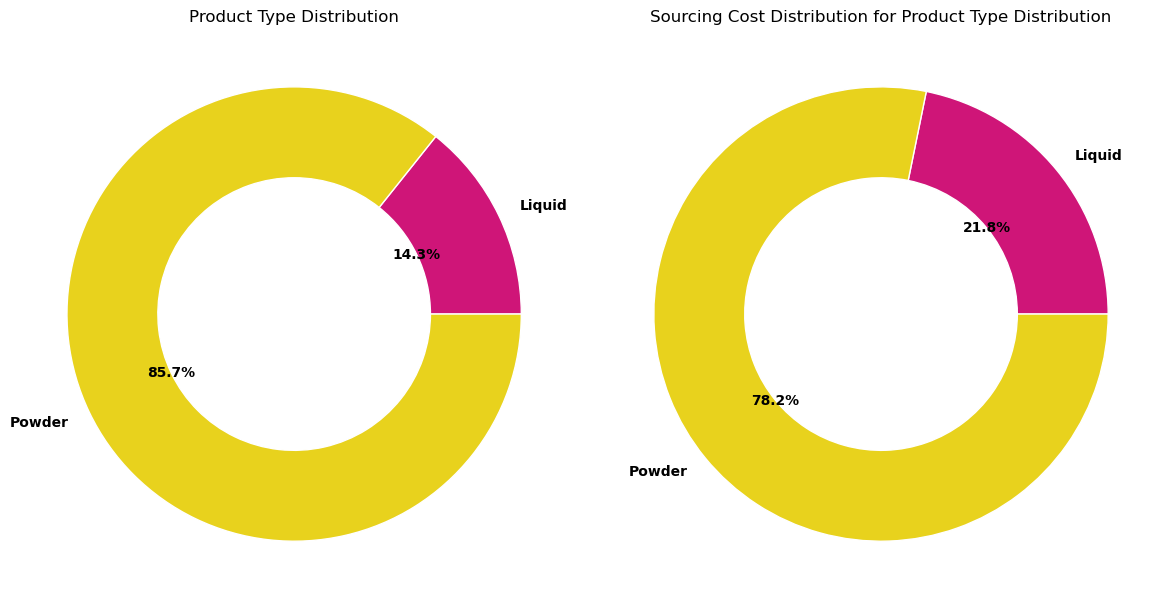

------------------------------
Product Type Distribution
------------------------------
Count:
Product Type
Liquid     78583
Powder    471593
Name: GranuleComboUnits, dtype: int64

Sourcing Cost:
Product Type
Liquid    242481.08
Powder    869581.71
Name: Sourcing Cost, dtype: float64




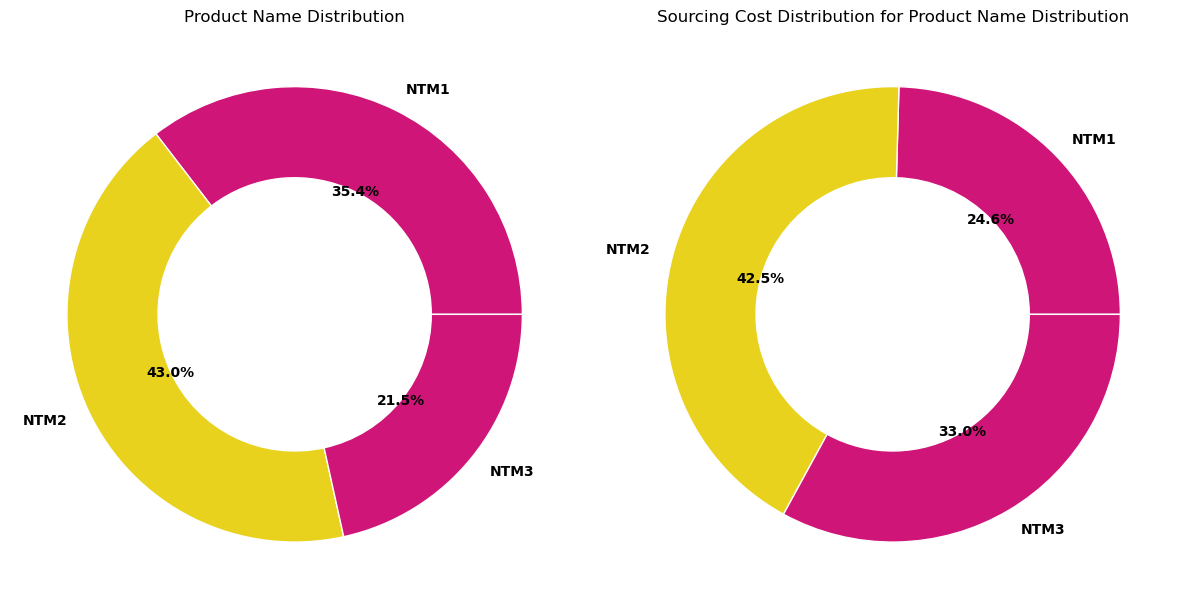

------------------------------
Product Name Distribution
------------------------------
Count:
ProductName
NTM1    194923
NTM2    236726
NTM3    118527
Name: GranuleComboUnits, dtype: int64

Sourcing Cost:
ProductName
NTM1    273114.76
NTM2    472484.30
NTM3    366463.73
Name: Sourcing Cost, dtype: float64




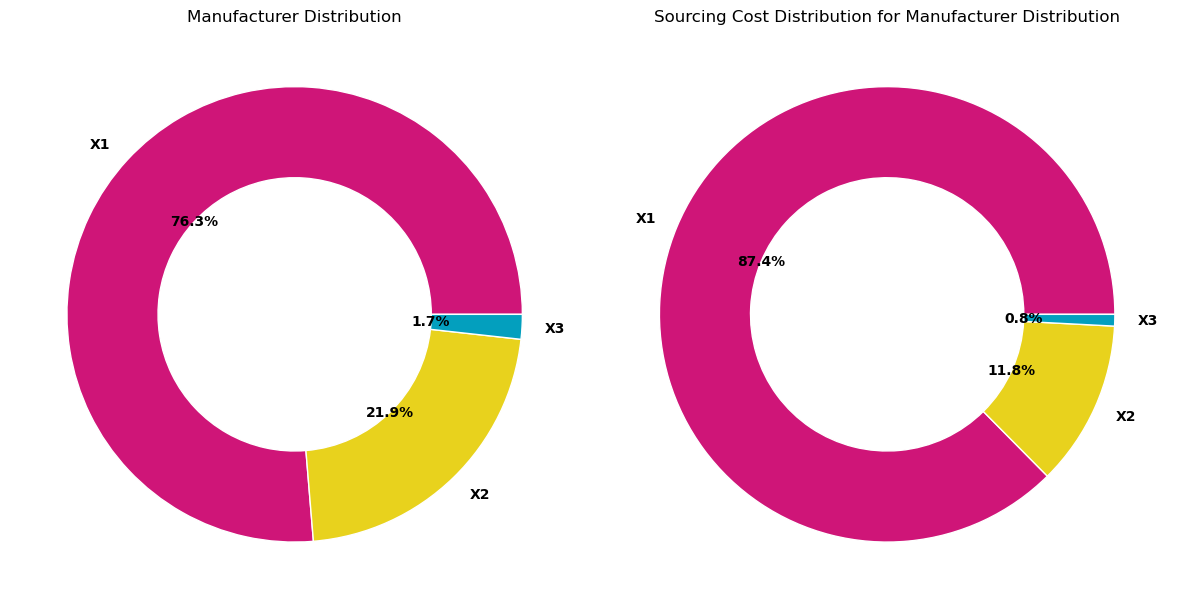

------------------------------
Manufacturer Distribution
------------------------------
Count:
Manufacturer
X1    419857
X2    120695
X3      9624
Name: GranuleComboUnits, dtype: int64

Sourcing Cost:
Manufacturer
X1    972190.21
X2    130710.01
X3      9162.57
Name: Sourcing Cost, dtype: float64




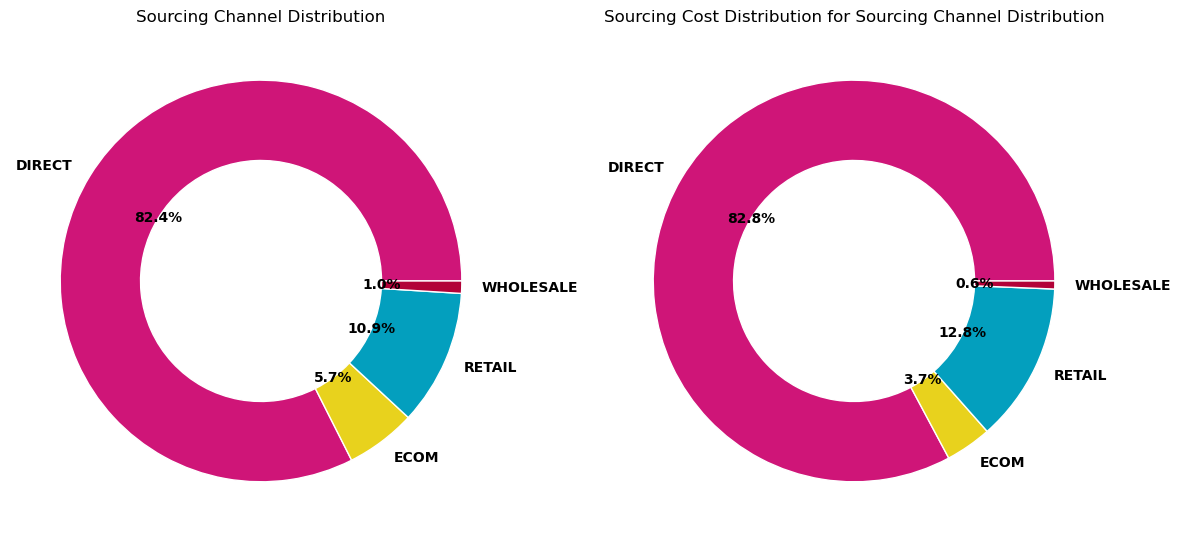

------------------------------
Sourcing Channel Distribution
------------------------------
Count:
Sourcing Channel
DIRECT       453617
ECOM          31106
RETAIL        60011
WHOLESALE      5442
Name: GranuleComboUnits, dtype: int64

Sourcing Cost:
Sourcing Channel
DIRECT       920966.36
ECOM          41323.85
RETAIL       142653.10
WHOLESALE      7119.48
Name: Sourcing Cost, dtype: float64




In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function for plotting pie charts and printing a report
def plot_pie(data, group_by_column, value_column, title, colors):
    group_counts = data.groupby(group_by_column)[value_column].sum()

    plt.figure(figsize=(12, 6))

    # Pie chart
    plt.subplot(1, 2, 1)
    wedges, labels, autopct = plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',
                                       colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

    # Add true values alongside percentages in chart labels
    plt.setp(autopct, fontsize=10, color='black', fontweight='bold')
    plt.setp(labels, fontsize=10, fontweight='bold')

    plt.title(title)

    # Plotting pie chart for Sourcing Cost
    plt.subplot(1, 2, 2)
    cost_by_group = data.groupby(group_by_column)['Sourcing Cost'].sum()
    wedges2, labels2, autopct2 = plt.pie(cost_by_group, labels=cost_by_group.index, autopct='%1.1f%%',
                                          colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

    # Add true values alongside percentages in chart labels
    plt.setp(autopct2, fontsize=10, color='black', fontweight='bold')
    plt.setp(labels2, fontsize=10, fontweight='bold')

    plt.title('Sourcing Cost Distribution for ' + title)

    plt.tight_layout()
    plt.show()

    # Print report
    print(f"{'-'*30}\n{title}\n{'-'*30}")
    print("Count:")
    print(group_counts)
    print("\nSourcing Cost:")
    print(cost_by_group)
    print('\n')

# Example usage
plot_pie(Train_Data, 'Product Type', 'GranuleComboUnits', 'Product Type Distribution', ['#cf1578', '#e8d21d'])
plot_pie(Train_Data, 'ProductName', 'GranuleComboUnits', 'Product Name Distribution', ['#cf1578', '#e8d21d'])
plot_pie(Train_Data, 'Manufacturer', 'GranuleComboUnits', 'Manufacturer Distribution', ['#cf1578', '#e8d21d', '#039fbe'])
plot_pie(Train_Data, 'Sourcing Channel', 'GranuleComboUnits', 'Sourcing Channel Distribution', ['#cf1578', '#e8d21d', '#039fbe', '#b20238'])


 <div class="alert alert-warning">
 
 ## <code style="background:;color:#00008B;">Product Type Distribution:

<b>There are significantly more units of Powder (471,593 units) compared to Liquid (78,583 units).
However, in terms of Sourcing Cost, Liquid products have a higher total cost ($242,481.08) compared to Powder products ($869,581.71). This suggests that Liquid products may have a higher unit cost or additional expenses associated with them.

 ## <code style="background:;color:#00008B;">Product Name Distribution:

<b>NTM2 has the highest count of units (236,726 units) among the three product names, followed by NTM1 (194,923 units) and NTM3 (118,527 units).
In terms of Sourcing Cost, NTM2 also has the highest cost ($472,484.30), followed by NTM1 ($273,114.76) and NTM3 ($366,463.73). This indicates that NTM2 products are both more numerous and more costly to source compared to the other product names.

 ## <code style="background:;color:#00008B;">Manufacturer Distribution:

<b>Manufacturer X1 has the highest count of units (419,857 units) among the three manufacturers, followed by X2 (120,695 units) and X3 (9,624 units).
In terms of Sourcing Cost, Manufacturer X1 also has the highest cost ($972,190.21), followed by X2 ($130,710.01) and X3 ($9,162.57). This suggests that while X1 produces the most units, it also incurs the highest sourcing cost.
    
 ## <code style="background:;color:#00008B;">Sourcing Channel Distribution:

<b>The DIRECT sourcing channel has the highest count of units (453,617 units), followed by RETAIL (60,011 units), ECOM (31,106 units), and WHOLESALE (5,442 units).
In terms of Sourcing Cost, the DIRECT channel also incurs the highest cost ($920,966.36), followed by RETAIL ($142,653.10), ECOM ($41,323.85), and WHOLESALE ($7,119.48). This indicates that while DIRECT sourcing accounts for the majority of units, it also has the highest sourcing cost, possibly due to higher unit costs or additional expenses associated with that channel.

## <code style="background:#CCF381;color:#00008B;">UNDERSTANDING TREND WITH FEATURE CATEGORIES

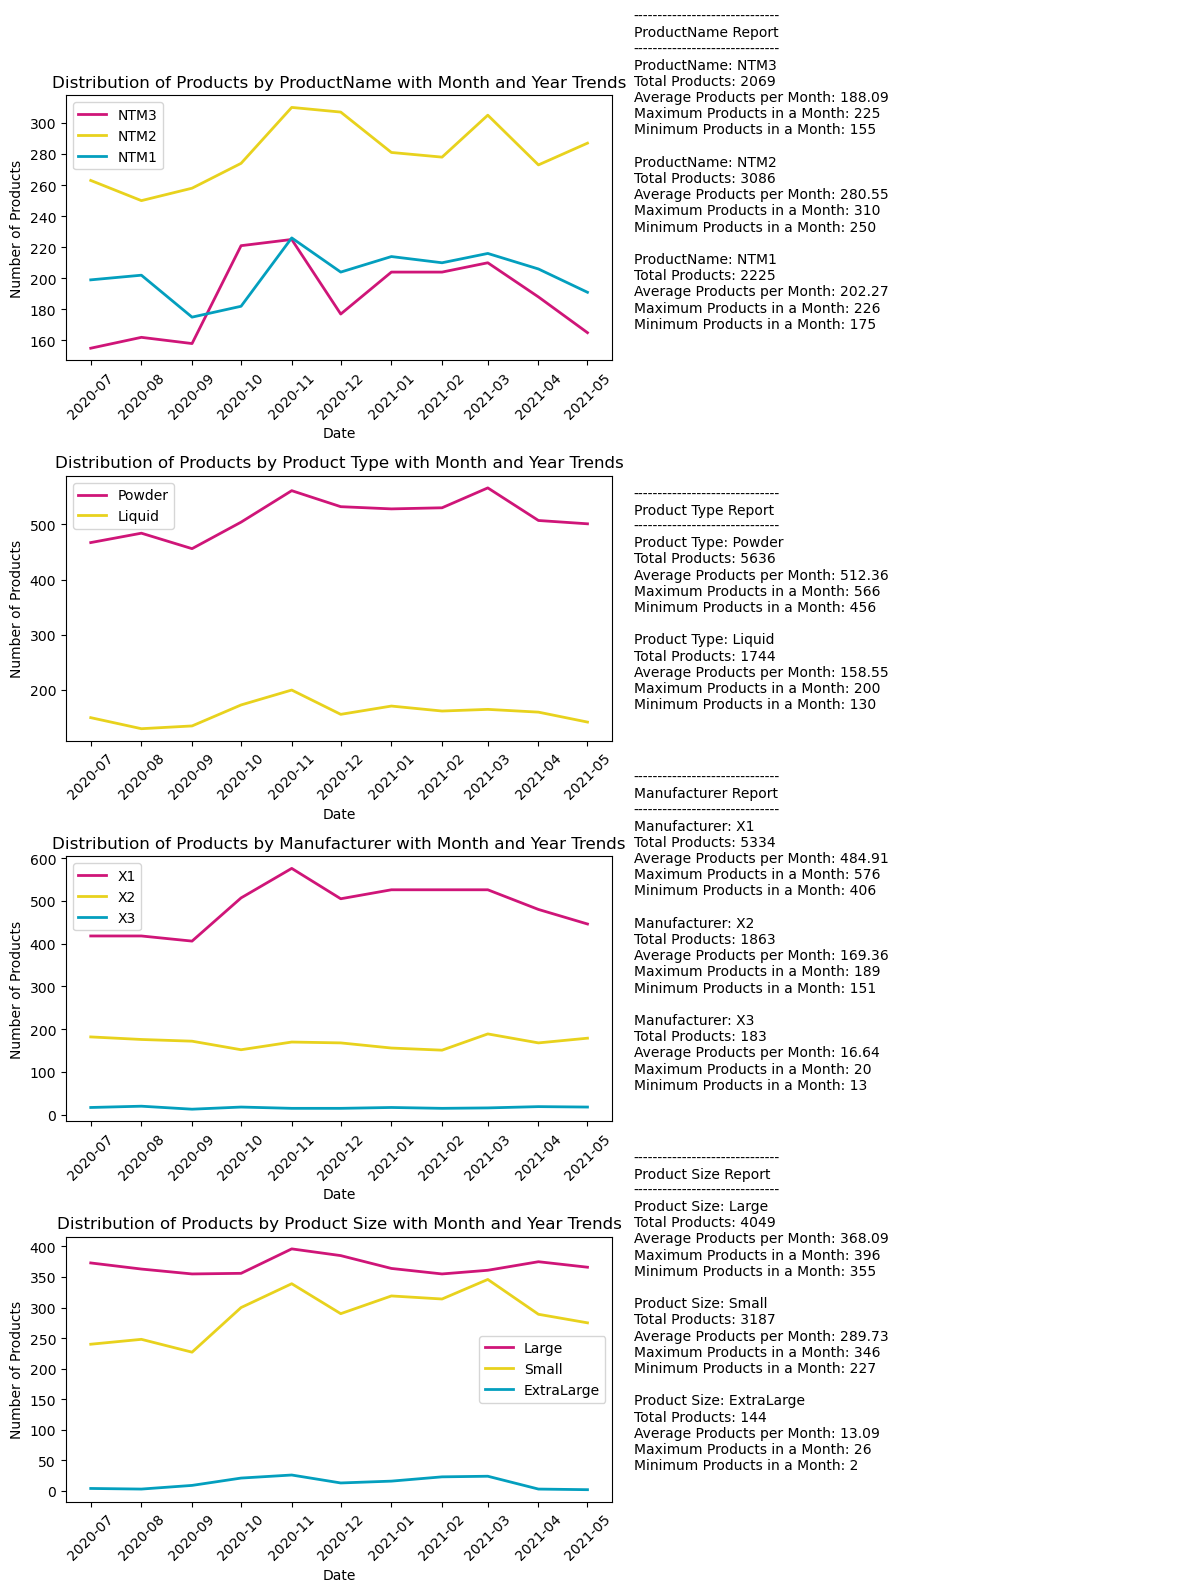

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Month' and 'Year' columns to datetime format
Train_Data['Date'] = pd.to_datetime(Train_Data['Month'] + ' ' + Train_Data['Year'].astype(str), format='%b %Y')

# Define colors for the plots
colors = ['#cf1578', '#e8d21d', '#039fbe', '#b20238']

# List of columns for which to generate subplots
columns_to_analyze = ['ProductName', 'Product Type', 'Manufacturer', 'Product Size']

fig, axs = plt.subplots(len(columns_to_analyze), 2, figsize=(12, 16))

for idx, column in enumerate(columns_to_analyze):
    column_report = []  # List to store column-wise report

    for i, value in enumerate(Train_Data[column].unique()):
        value_data = Train_Data[Train_Data[column] == value]
        monthly_trend = value_data.groupby('Date').size().reset_index(name='Count')
        axs[idx, 0].plot(monthly_trend['Date'], monthly_trend['Count'], color=colors[i], linewidth=2, label=value)

        # Generate column-wise report
        column_report.append({
            column: value,
            'Total Products': value_data.shape[0],
            'Average Products per Month': monthly_trend['Count'].mean(),
            'Maximum Products in a Month': monthly_trend['Count'].max(),
            'Minimum Products in a Month': monthly_trend['Count'].min()
        })

    axs[idx, 0].set_xlabel('Date')
    axs[idx, 0].set_ylabel('Number of Products')
    axs[idx, 0].set_title(f'Distribution of Products by {column} with Month and Year Trends')
    axs[idx, 0].legend()
    axs[idx, 0].tick_params(axis='x', rotation=45)

    # Print the report
    report_text = f"{'-'*30}\n{column} Report\n{'-'*30}\n"
    for report in column_report:
        report_text += f"{column}: {report[column]}\n"
        report_text += f"Total Products: {report['Total Products']}\n"
        report_text += f"Average Products per Month: {report['Average Products per Month']:.2f}\n"
        report_text += f"Maximum Products in a Month: {report['Maximum Products in a Month']}\n"
        report_text += f"Minimum Products in a Month: {report['Minimum Products in a Month']}\n\n"
    
    axs[idx, 1].axis('off')
    axs[idx, 1].text(0, 0, report_text, fontsize=10)

plt.tight_layout()
plt.show()


 <div class="alert alert-warning">
 
 ## <code style="background:;color:#00008B;">ProductName Insight:

<b>NTM3 has the highest total products at 2069, with an average of 188.09 products per month.
<b>NTM2 has the highest average products per month at 280.55, with a minimum of 250 products in a month.
<b>NTM1 has a consistent monthly production, with an average of 202.27 products per month.
    
 ## <code style="background:;color:#00008B;">Product Type Insight:

<b>Powder products dominate with a total of 5636 products, showing a strong production trend.
<b>Liquid products have a lower count but still show a consistent production pattern.
    
 ## <code style="background:;color:#00008B;">Manufacturer Insight:

<b>Manufacturer X1 has the highest total products at 5334, maintaining an average of 484.91 products per month.
<b>Manufacturer X3 has the lowest production, indicating a smaller-scale operation.
    
 ## <code style="background:;color:#00008B;">Product Size Insight:

<b>Large-sized products are the most produced, with a total of 4040 products and a consistent monthly average of 368.
<b>Small-sized products have a lower total count but exhibit higher variability in monthly production.


## <code style="background:#CCF381;color:#00008B;">AREA WISE DOMINATION BAR PLOT

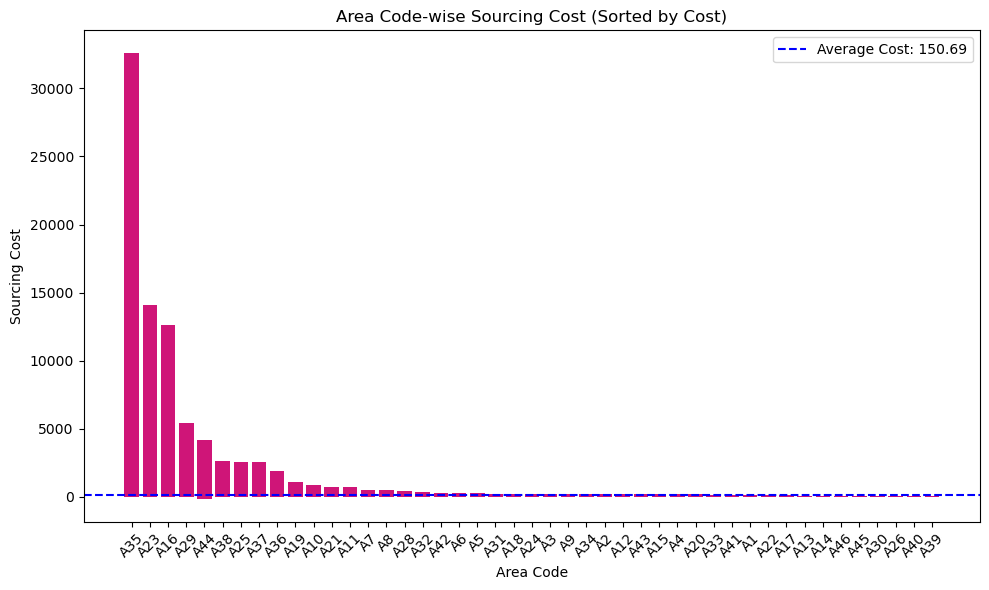

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort the dataframe by 'Sourcing Cost' in descending order
sorted_data = Train_Data.sort_values(by='Sourcing Cost', ascending=False)

# Plotting area code-wise sourcing cost with sorted data
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_data['Area Code'], sorted_data['Sourcing Cost'], color='#cf1578')

# Adding trend line (average sourcing cost)
average_cost = sorted_data['Sourcing Cost'].mean()
plt.axhline(y=average_cost, color='b', linestyle='--', label=f'Average Cost: {average_cost:.2f}')

plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.title('Area Code-wise Sourcing Cost (Sorted by Cost)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


 <div class="alert alert-warning">
 
 ## <code style="background:;color:#00008B;">Area Code Insight:
<b>First 5 Area code has almost all market capture with avg cost of 150.69

## <code style="background:#CCF381;color:#00008B;">Conclusive Summary:


 <div class="alert alert-success">

## <code style="background:;color:#00008B;">Data Preprocessing and Analysis:

<b>Data Cleaning: The dataset was preprocessed to handle duplicate entries and obtain unique counts using the 'GranuleComboUnits' column.
Feature Engineering: New features such as 'Month', 'Year', and 'Date' were derived from the 'Month of Sourcing' column for better analysis.
Exploratory Data Analysis (EDA): Various aspects of the dataset were explored, including product types, manufacturers, sourcing channels, and trends over time.
## <code style="background:;color:#00008B;">Product Type and Manufacturer Insights:

<b>Product Type Distribution: Powder products dominate the dataset, both in terms of count (471,593 units) and sourcing cost (\$869,581.71). However, Liquid products have a higher average sourcing cost per unit, indicating potential higher unit costs or added expenses.
Manufacturer Distribution: Manufacturer X1 leads in both total products (419,857 units) and sourcing cost (\$972,190.21), indicating significant market presence and possibly higher-priced products.
## <code style="background:;color:#00008B;">Sourcing Channel Performance:

DIRECT Channel: <b>Leads in total products (453,617 units) and sourcing cost (\$920,966.36), suggesting high volume and potentially higher-cost items.
RETAIL Channel: Shows a substantial number of units (60,011 units) but lower sourcing cost (\$142,653.10), indicating a different market segment or pricing strategy.
ECOM Channel: Represents a smaller share in both units (31,106 units) and cost (\$41,323.85), possibly due to its online nature and lower operational costs.
WHOLESALE Channel: Has the least number of units (5,442 units) and lowest sourcing cost (\$7,119.48), suggesting a niche market or specific product range.
## <code style="background:;color:#00008B;">Trend Analysis by Feature Categories:

<b>Product Name Insight: NTM2 stands out with the highest total products (236,726 units) and sourcing cost (\$472,484.30), indicating strong market demand and potentially higher-priced products.
Product Type Insight: Powder products dominate with a consistent production trend, while Liquid products show a lower count but consistent production.
Manufacturer Insight: X1 leads in production and cost, showcasing market dominance, while X3 represents a smaller-scale operation.
Product Size Insight: Large-sized products are most produced, indicating consumer preference or market demand for such products.
## <code style="background:;color:#00008B;">Area Code-wise Sourcing Cost Analysis:

<b>The bar plot showcases the area code-wise sourcing cost, with the first 5 area codes capturing most of the market share and an average cost of \$150.69.
Overall, this analysis provides valuable insights into product distribution, market performance across channels, manufacturer contributions, and trend analysis by different feature categories. These insights can guide strategic decision-making, marketing strategies, and resource allocation within the business.